In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.image as mpimg

import glob
import re
import pickle
scaler = preprocessing.MinMaxScaler((0,1))
plt.rcParams['savefig.dpi'] = 50

In [2]:
import sys
print(sys.version)
print(sys.executable)

3.6.13 |Anaconda, Inc.| (default, Feb 23 2021, 21:15:04) 
[GCC 7.3.0]
/home/wamdm/anaconda3/envs/tensorflowCPU/bin/python


In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
from tensorflow.keras import models
from scipy import interpolate

In [4]:
def img_to_array(imageFile):
    img = mpimg.imread(imageFile).astype(np.float)
    img=img[:,:,0]
    img=1-img
    return img.reshape((50,50,1))

### 开始测试

In [5]:
path_0 = "./GWAC_data/test_0/*.png"
# path_0 = "./Finded_0909/*.png"
path_1 = "./GWAC_data/test_1/*.png"

pool_0=[imageFile for imageFile in glob.glob(path_0)]
pool_1=[imageFile for imageFile in glob.glob(path_1)]
print("len(pool_1)",len(pool_1))
print("len(pool_0)",len(pool_0))

len(pool_1) 2633
len(pool_0) 6872


In [6]:
test_sample_size=len(pool_1)+len(pool_0)
x_test = np.zeros((test_sample_size, 50,50,1))
y_test = np.zeros((test_sample_size,2))

In [7]:
### 训练模型。但不明白其中的24和80是怎么回事，哪来的，可能是作者自己定义的。

# [0,1]1 for fs
# [1,0]0 for blank
y0=np.array([1,0])
y1=np.array([0,1])

sample_monitor0=[]
sample_monitor1=[]

positive = []
negative = []
### 生成3000个样本，用来训练，其中三种类别的比例是一样的
for i in range(test_sample_size):
    ## 从各自的样本数量范围内，随机抽取一个整数
    if i<len(pool_1):
        x_test[i] = img_to_array(pool_1[i])
        y_test[i] = y1
        positive.append(i)
    else:
        x_test[i] = img_to_array(pool_0[i-len(pool_1)-1])
        y_test[i] = y0
        negative.append(i)

In [8]:
positive

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [9]:
num_classes = 2
input_shape = (50,50,1)
x_test.shape

(9505, 50, 50, 1)

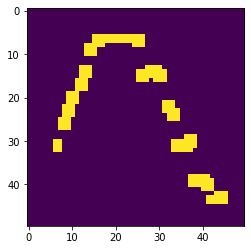

In [10]:
plt.imshow(x_test[160].reshape(50,50))

In [15]:
#读取训练的模型
from tensorflow.keras.models import load_model
model = load_model("./LeNet_batch_size_100_epochs_3_kernel_size_543_accuracy_0.9944770336151123.h5")

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 46, 46, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 16)        1552      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [16]:
from sklearn.metrics import confusion_matrix
true_y=np.apply_along_axis(np.argmax,1,y_test)

pred_y=model.predict(x_test)
pred_y=np.apply_along_axis(np.argmax,1,pred_y)

confusion_mat = confusion_matrix(true_y, pred_y)

confusion_mat

array([[6842,   30],
       [   7, 2626]])

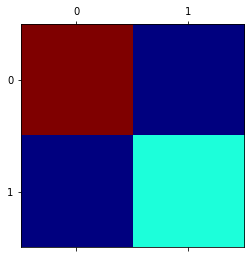

In [17]:
plt.matshow(confusion_mat, cmap='jet')#viridis,jet_r,rainbow

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(true_y,pred_y,digits=4))

              precision    recall  f1-score   support

           0     0.9990    0.9956    0.9973      6872
           1     0.9887    0.9973    0.9930      2633

    accuracy                         0.9961      9505
   macro avg     0.9938    0.9965    0.9952      9505
weighted avg     0.9961    0.9961    0.9961      9505



In [23]:
from timeit import default_timer as timer
test_time_cnn = []
for i in range(10):
    start_time = timer()
    print(start_time)
    model.predict(x_test)
    current_time = timer()
    print(current_time)
    test_time_cnn.append(current_time-start_time)
    print(current_time-start_time)
    i = i+1
print(test_time_cnn)
print(np.mean(test_time_cnn))

48871187.73681304
48871188.99158615
1.254773110151291
48871188.99172161
48871190.27112259
1.2794009819626808
48871190.27290545
48871192.006374635
1.7334691882133484
48871192.00685336
48871193.25960965
1.2527562901377678
48871193.25998099
48871194.50047734
1.2404963448643684
48871194.500950664
48871195.74345692
1.2425062581896782
48871195.743918665
48871198.0662283
2.322309635579586
48871198.06670854
48871199.292305864
1.225597321987152
48871199.29269933
48871200.871610805
1.5789114758372307
48871200.87170717
48871202.29923846
1.427531287074089
[1.254773110151291, 1.2794009819626808, 1.7334691882133484, 1.2527562901377678, 1.2404963448643684, 1.2425062581896782, 2.322309635579586, 1.225597321987152, 1.5789114758372307, 1.427531287074089]
1.4557751893997193


### 绘制类激活热力图

In [60]:

def heatmapcam(img,i,path):
    last_conv_layer='conv2d_5'

#     predicts=model.predict_classes(img)
    predicts=model.predict(img)
#     print("predicts",predicts)
    print(np.argmax(predicts[0]),predicts[0].max())

    # get the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer)

    heatmap_model = models.Model([model.inputs], [last_conv_layer.output, model.output])

    with tf.GradientTape() as gtape:
        conv_output, Predictions = heatmap_model(img)
#         print("Predictions",Predictions)
        prob = Predictions[:, np.argmax(Predictions[0])] # 最大可能性类别的预测概率
#         print("prob",prob)
        grads = gtape.gradient(prob, conv_output)  # 类别与卷积层的梯度 (1,14,14,512)
        pooled_grads = K.mean(grads, axis=(0,1,2)) # 特征层梯度的全局平均代表每个特征层权重
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1) #权重与特征层相乘，512层求和平均

    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat
    # plt.matshow(heatmap[0], cmap='jet')#viridis,jet_r,rainbow


    heatmap_sample=heatmap[0]
#     print("heatmap_sample",heatmap_sample)
    cov_size=10
    x = np.arange(0, cov_size, 1)
    y = np.arange(0, cov_size, 1)

    f = interpolate.interp2d(x, y, heatmap_sample, kind='cubic')

    xnew = np.linspace(0, cov_size, 50)
    ynew = np.linspace(0, cov_size, 50)
    znew = f(xnew, ynew)

    ## 画出热力图
    plt.matshow(znew, cmap='jet')#viridis,jet_r,rainbow
    plt.tight_layout()
    plt.savefig(path + str(i) + '_'+ str(np.argmax(predicts[0])) +'_'+ str(predicts[0].max())+'.png')
    ## cmap='Greys_r'表示画出的图为灰度图
    ## 叠加原图
    plt.imshow(img.reshape(50,50),cmap='Greys_r',alpha=0.5)
    plt.savefig(path + str(i) + '_'+ str(np.argmax(predicts[0])) +'_'+ str(predicts[0].max())+'.png')
#     plt.clf()#添加上这一行，画完图后，重置一下
    plt.close()

In [61]:
### 画出标签为1的热力图，但模型的判断结果不一定为1
for i in positive :
    img=x_test[i].reshape(1,50,50,1)
    path = '../heatmap/heatmaptest332/'
    heatmapcam(img,i,path)

0 0.5600283


/home/wamdm/anaconda3/envs/tensorflowCPU/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


1 0.9520607
1 0.97341114
1 0.957182
1 0.9495192
1 0.76376235
1 0.9413892
1 0.92256105
1 0.9198393
1 0.97447586
1 0.9773219
1 0.9768404
1 0.9540025
0 0.6376034
1 0.9291062
1 0.9338095
1 0.9595991
1 0.9480663
1 0.9480842
1 0.77135384
1 0.9495151
1 0.94167143
1 0.9273497
1 0.9363264
0 0.5824229
1 0.8275043
1 0.9496888
1 0.6867075
1 0.84304905
1 0.93520665
1 0.54569936
1 0.7746277
1 0.963384
1 0.6643507
1 0.899038
1 0.93269837
1 0.90392834
1 0.92726165
1 0.9597799
1 0.78684217
1 0.7556999
1 0.8125866
1 0.9756433
1 0.97039807
1 0.9367085
1 0.9507638
1 0.6769377
1 0.93797594
1 0.93107617
1 0.9433653
1 0.90147626
1 0.924655
1 0.9461694
1 0.9455588
1 0.95733666
1 0.9593051
1 0.5728224
0 0.6237099
1 0.92310876
1 0.96522886
1 0.81083566
0 0.6792867
1 0.53429693
1 0.8294291
1 0.9550157
0 0.56009346
1 0.9522717
1 0.95166314
1 0.5390028
1 0.9369672
1 0.96380216
1 0.92920244
1 0.66574097
1 0.9344658
1 0.9662375
1 0.9615537
1 0.9121355
1 0.809763
1 0.58810115
1 0.9509615
1 0.5394692
1 0.9438099
1 0.9

1 0.93198484
1 0.7670948
1 0.93748194
1 0.88975084
1 0.9175596
1 0.956031
1 0.9610058
1 0.6758184
1 0.93412405
1 0.5464178
1 0.9757244
0 0.51672196
1 0.71388936
1 0.9128564
1 0.6699188
1 0.9197628
1 0.9326971
0 0.50679463
1 0.942211
1 0.96629626
1 0.9413077
0 0.5182957
0 0.9058533
1 0.8133509
1 0.6999798
1 0.92624485
1 0.965876
1 0.9560641
1 0.8539243
1 0.5471771
1 0.93776613
1 0.95940584
1 0.93587154
1 0.912557
1 0.9661827
1 0.73979867
1 0.93886775
1 0.97573894
1 0.96453786
0 0.6215333
1 0.9615359
1 0.90985507
1 0.951252
1 0.51353246
1 0.9166997
0 0.8273928
1 0.95438457
1 0.9597799
1 0.9418161
1 0.9760311
1 0.67195994
1 0.6769377
1 0.6875036
1 0.90389174
1 0.9428304
1 0.9595726
1 0.5344944
1 0.95743513
1 0.95539206
1 0.96308464
1 0.9517592
1 0.9470357
1 0.92440814
1 0.9684705
1 0.91168314
1 0.95757973
1 0.9559056
1 0.97553647
1 0.94963366
1 0.73091644
1 0.9544535
1 0.9462698
1 0.82023716
1 0.96550995
1 0.96373516
1 0.9505186
1 0.9593739
1 0.94326687
1 0.50236785
1 0.7779134
1 0.897036

1 0.9610573
1 0.92576903
1 0.9591737
0 0.9977343
1 0.9426367
1 0.9448513
1 0.94510645
1 0.9413077
1 0.9268807
0 0.99726665
1 0.9024021
1 0.9531129
1 0.9375054
1 0.95757973
1 0.5208739
0 0.92493373
1 0.95494336
1 0.7436743
1 0.5313499
1 0.9654969
1 0.9484845
1 0.9397154
1 0.9675793
1 0.6259547
1 0.9437117
1 0.7814851
1 0.95095974
1 0.95940584
1 0.9597799
1 0.9684705
0 0.98515075
1 0.95245636
1 0.947987
1 0.9490769
0 0.7553852
1 0.97533584
1 0.9616528
1 0.9545138
1 0.92881155
1 0.76628435
1 0.89550805
1 0.94841474
0 0.7111561
1 0.9530443
1 0.9567751
1 0.95058256
1 0.94184715
1 0.9579039
1 0.9088604
1 0.5728224
1 0.9450524
1 0.89097327
0 0.9983032
1 0.9603251
1 0.9369089
1 0.9760543
0 0.6768901
0 0.5040164
1 0.95774674
1 0.9573229
1 0.79980797
1 0.9513395
0 0.62983257
1 0.94488883
1 0.9429489
1 0.9564623
1 0.94399005
0 0.50605655
1 0.61204404
1 0.9707235
1 0.9165627
1 0.94967896
1 0.85168004
1 0.9573229
1 0.9265218
1 0.9274702
1 0.9128564
1 0.97368866
1 0.9374575
1 0.9680411
1 0.9423917
1

1 0.9544535
1 0.9148918
1 0.51407754
1 0.50568736
1 0.9302475
1 0.6640626
1 0.51510257
1 0.90392834
1 0.9550218
1 0.95841646
1 0.82792795
1 0.9438628
1 0.9652224
1 0.96534383
1 0.9499483
1 0.92509115
1 0.9042614
1 0.63956034
1 0.7875962
1 0.93821084
1 0.95789766
1 0.9364877
1 0.96037287
1 0.89507097
1 0.91933537
1 0.9461941
1 0.93779165
1 0.9016909
1 0.9404625
1 0.94945276
1 0.9585452
0 0.9947471
1 0.9197134
1 0.93303925
1 0.7985558
1 0.9678652
1 0.95531005
1 0.96032304
1 0.94895697
1 0.91392833
1 0.9433653
1 0.96308464
1 0.71786827
1 0.9282989
1 0.9031345
1 0.926478
1 0.96522886
1 0.79271954
1 0.7548219
1 0.96186495
1 0.9446504
1 0.93200177
1 0.8422112
1 0.9320806
1 0.8555317
1 0.94957876
1 0.9316116
1 0.9461401
1 0.9519445
0 0.7359274
1 0.91616434
1 0.8858541
1 0.9172457
0 0.73898184
1 0.94869524
0 0.7688738
1 0.9624695
1 0.9567751
1 0.9394292
1 0.9625456
1 0.822152
1 0.7901918
1 0.9301533
1 0.95808774
1 0.76994735
1 0.55802333
1 0.94363886
1 0.61659485
1 0.96649945
1 0.72069085
0 0.

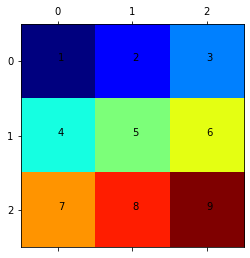

In [77]:
## 这是对plt.matshow(znew, cmap='jet')中参数jet的解释，值越大，色调越暖，
import matplotlib.pyplot as plt
import numpy as np

mat = np.arange(1, 10).reshape(3, 3)

plt.matshow(mat, cmap=plt.cm.jet)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        plt.text(x=j, y=i, s=mat[i, j])
               
plt.show()

In [42]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = load_model("./LeNet_batch_size_512_epochs_10_kernel_size_1193_accuracy_0.9170765280723572.h5")

model.summary()

true_y=np.apply_along_axis(np.argmax,1,y_test)

pred_y=model.predict(x_test)
pred_y=np.apply_along_axis(np.argmax,1,pred_y)

print(classification_report(true_y,pred_y,target_names=['other','flare']))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 40, 40, 32)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        165952    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [43]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = load_model("./LeNet_batch_size_512_epochs_10_kernel_size_974_accuracy_0.9430344700813293.h5")

model.summary()

true_y=np.apply_along_axis(np.argmax,1,y_test)

pred_y=model.predict(x_test)
pred_y=np.apply_along_axis(np.argmax,1,pred_y)

print(classification_report(true_y,pred_y,target_names=['other','flare']))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 42, 42, 32)        2624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        100416    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         131200    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [44]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = load_model("./LeNet_batch_size_512_epochs_10_kernel_size_742_accuracy_0.919864296913147.h5")

model.summary()

true_y=np.apply_along_axis(np.argmax,1,y_test)

pred_y=model.predict(x_test)
pred_y=np.apply_along_axis(np.argmax,1,pred_y)

print(classification_report(true_y,pred_y,target_names=['other','flare']))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 44, 44, 32)        1600      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 19, 19, 64)        32832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [45]:

from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = load_model("./LeNet_batch_size_512_epochs_10_kernel_size_543_accuracy_0.9357756972312927.h5")

model.summary()

true_y=np.apply_along_axis(np.argmax,1,y_test)

pred_y=model.predict(x_test)
pred_y=np.apply_along_axis(np.argmax,1,pred_y)

print(classification_report(true_y,pred_y,target_names=['other','flare']))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [62]:
model = load_model("./LeNet_batch_size_512_epochs_10_kernel_size_1383_accuracy_0.9205217957496643.h5")

model.summary()

true_y=np.apply_along_axis(np.argmax,1,y_test)

pred_y=model.predict(x_test)
pred_y=np.apply_along_axis(np.argmax,1,pred_y)

print(classification_report(true_y,pred_y,target_names=['other','flare']))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 38, 38, 32)        5440      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        131136    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [63]:
model = load_model("./LeNet_batch_size_512_epochs_10_kernel_size_1573_accuracy_0.9118428230285645.h5")

model.summary()

true_y=np.apply_along_axis(np.argmax,1,y_test)

pred_y=model.predict(x_test)
pred_y=np.apply_along_axis(np.argmax,1,pred_y)

print(classification_report(true_y,pred_y,target_names=['other','flare']))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 36, 36, 32)        7232      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        100416    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [64]:
model = load_model("./LeNet_batch_size_512_epochs_10_kernel_size_1782_accuracy_0.9196538925170898.h5")

model.summary()

true_y=np.apply_along_axis(np.argmax,1,y_test)

pred_y=model.predict(x_test)
pred_y=np.apply_along_axis(np.argmax,1,pred_y)

print(classification_report(true_y,pred_y,target_names=['other','flare']))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 34, 34, 32)        9280      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        131136    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         32896     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              